## TC 5033
### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



### **Members**

**Luis Alejandro Aguilar Díaz - A01795362**

**Pablo Yamamoto Magaña - A01022382**

**Gabriel Paredes Garza - A00797698**

**Abril Cota - A01795114**

**Daniel Guzmán Ávila - A00781387**


#### Import libraries

We import important libraries from torch (For GPU use), sklearn (For TSNE and PCA use - for reduction of high dimensional data), matplotlib (for potting), numpy (for mathematical operations) and pickle (For object serialization and deserialization).

In [1]:
# Import libraries
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')

#### Load file

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Store Path of glove.6B.50d.txt in a PATH variable, also we initialize emb_dim variable with a value of 50.

In [3]:
#PATH = '/content/drive/MyDrive/my documents/COLAB/Advanced Machine Learning/activity 3/glove.6B/glove.6B.50d.txt'
PATH = './glove.6B/glove.6B.50d.txt'
emb_dim = 50

We create a function that is capable of receiving a path variable.

Said function takes path and opens file to iterate trough its content (line by line) where a word and its vector is found, and split it and store it in a dictionary where the key corresponds to the word and the values are vectors founds.

That dictionary is finally returned after the loop ends.

In [4]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
    embeddings_dict = {}
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], "float32")
            embeddings_dict[word] = vector
    return embeddings_dict

We use create_emb_dictionary function to create dictionary with all values found in glove.6B.50d.txt file and store it in a dictionary called embeddings_dict.

In [5]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH)

We open embeddings_dict_50D.pkl file and serialize it with pickle.dump().

In [6]:
# Serialize
with open('embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

# Deserialize
# with open('embeddings_dict_200D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

#### See some embeddings

We create a function show_n_first_words that its functionallity consists of taking a path and a number and iterates trough the file that is stored in the path and prints its content.

For content we mean words and its vectors.


In [7]:
# Show some
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

We call function show_n_first_words to iterate trough file that is stored in our previously given path and print 5 words and its corresponding vectors.

In [8]:
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

We access to key 'the' to view its value (vectors) from embeddings_dict dictionary.

In [9]:
embeddings_dict['the']

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
      dtype=float32)

### Plot some embeddings

We create a function called plot_embeddings, that creates an array of embeddings found in embeddings_dict dictionary, then, creates a PCA Model with two principal components (dimensions) that uses previously said array to fit and transform.

Then, while iterating trough attribute words2show (that contains all words to show in a plot) and obtaining its x and y coordinates via two_d_words list and then plot it.

In [11]:
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func = PCA):
    terms = np.array([embeddings_dict[word] for word in words2show])

    model = func(n_components=2)
    two_d_words = model.fit_transform(terms)
    fig, ax = plt.subplots(figsize=(15,6))

    for i, term in enumerate(words2show):
        x, y = two_d_words[i, :]
        ax.scatter(x, y)
        ax.annotate(
            term,
            (x, y),
            xytext=(4,2),
            textcoords='offset points'
        )

    plt.title('word embeddings ' + func.__name__)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    return two_d_words

We define a variable words where all words of our preference are going to be stored inside an array.

In [12]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


We call function plot_embeddings that takes file stored in defined path, defined words and our choose of dimentional reduction algorithm, PCA, to finally execute a plot of all choosen words located in a 2D plane.

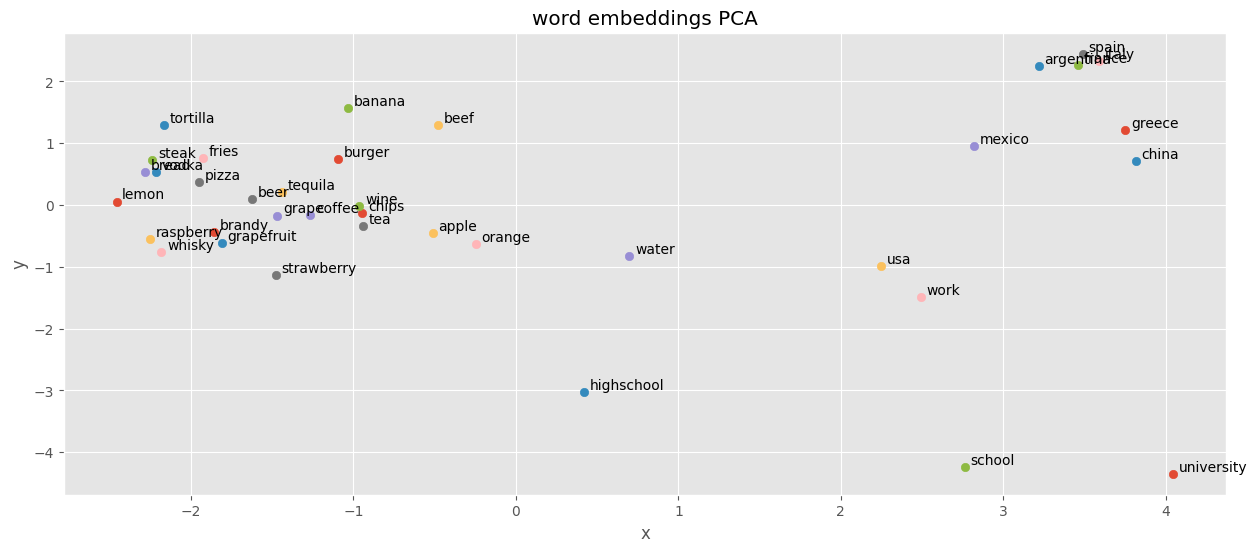

array([[-1.0925041 ,  0.74372876],
       [-2.1670628 ,  1.292367  ],
       [-2.2834158 ,  0.52902204],
       [-1.9500184 ,  0.3721772 ],
       [-0.47766322,  1.2940513 ],
       [-2.2378066 ,  0.7307441 ],
       [-1.92657   ,  0.75569266],
       [-0.9450014 , -0.13504937],
       [ 3.2193754 ,  2.246692  ],
       [ 2.8189163 ,  0.95552075],
       [ 3.488131  ,  2.4482503 ],
       [ 2.2472813 , -0.9943583 ],
       [ 3.4618902 ,  2.269228  ],
       [ 3.5916219 ,  2.3245144 ],
       [ 3.7501671 ,  1.2115402 ],
       [ 3.8158362 ,  0.7147594 ],
       [ 0.69911534, -0.83254534],
       [-1.6239517 ,  0.10265356],
       [-1.439923  ,  0.20648277],
       [-0.962911  , -0.02196907],
       [-2.1817415 , -0.7590347 ],
       [-1.8575069 , -0.43355262],
       [-2.2137516 ,  0.52904844],
       [-1.2642858 , -0.15639098],
       [-0.9421787 , -0.34516948],
       [-0.5101739 , -0.45191413],
       [-1.033432  ,  1.5628412 ],
       [-0.24471143, -0.6360452 ],
       [-2.4575224 ,

In [13]:
#
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

We call function plot_embeddings that takes file stored in defined path, defined words and our choose of dimentional reduction algorithm, TSNE, to finally execute a plot of all choosen words located in a 2D plane.

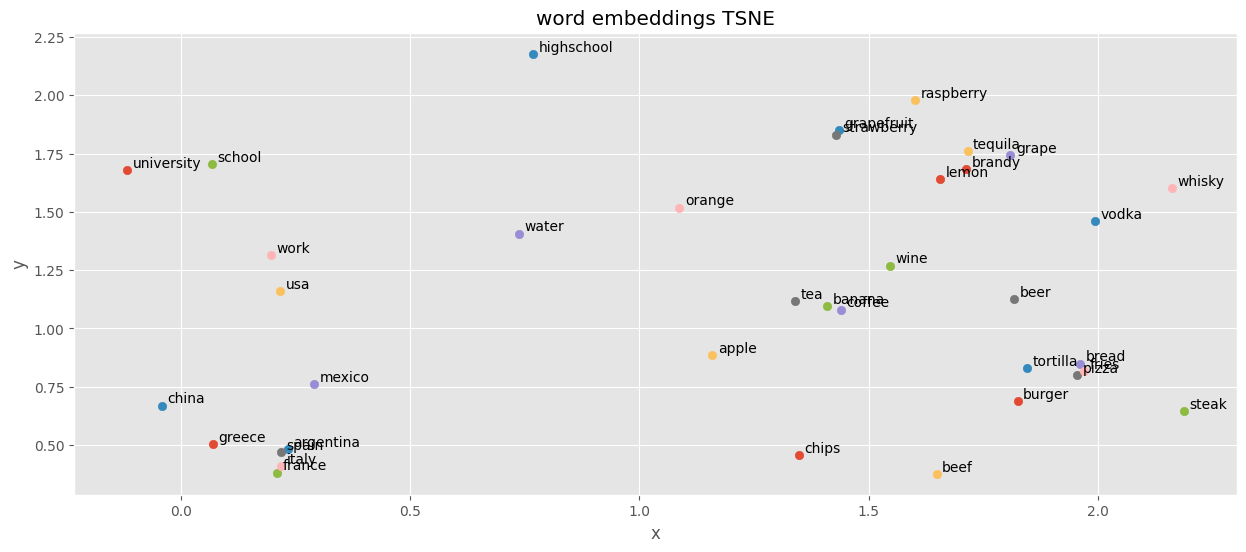

In [14]:
# t-SNE dimensionality reduction for visualization
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)

### Let us compute analogies

We declare cosine_distance function, that takes X and Y values and then calculates dot product, norm product and cosine similarity.

This function returns cosine_similarity minnus 1, so the cosine similarity can be more accurate even for negative values.

In [16]:
#cosine_distance
def cosine_distance(X, Y):
    XdotY = np.dot(X,Y)
    normsProduct = norm(X) * norm(Y)
    cosine_similarity = XdotY / normsProduct
    return 1 - cosine_similarity

Then, we declare a analogy function, which takes three words and a dictionary, calculates closest words related to word3 and then return the word whose cosine distance is the closest.

In [17]:
# analogy
def analogy(word1, word2, word3, embeddings_dict):
    result = embeddings_dict[word2] - embeddings_dict[word1] + embeddings_dict[word3]
    return sorted(embeddings_dict.keys(), key=lambda w: cosine_distance(embeddings_dict[w], result))[1:2]

We call analogy function to return closest word to 'Woman' given relatitionship between 'man' and 'king'

In [18]:
analogy('man', 'king', 'woman', embeddings_dict)

['queen']

Then, we create function find_most_similar, that takes a word, a dictionary and a total number of words related to previously given word.

After that, we obtain all keys (words) for embeddings_dict and compare versus the word of our choose and provide top 10 most related words trough cosine distance calculous.

In [19]:
# most similar
def find_most_similar(word, embeddings_dict, top_n=10):
    return sorted(embeddings_dict.keys(), key=lambda w: cosine_distance(embeddings_dict[w], embeddings_dict[word]))[1:top_n+1]

We call find_most_similar function for word 'mexico' given embeddings_dict dictionary to return top most 20 related words and store result in most_similar.

In [20]:
most_similar = find_most_similar('mexico', embeddings_dict, 20)

And finally, we iterate trough most_similar to print top 20 results.

In [21]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> chile
6 ---> puerto
7 ---> rico
8 ---> cuba
9 ---> guatemala
10 ---> panama
11 ---> brazil
12 ---> costa
13 ---> bolivia
14 ---> ecuador
15 ---> argentina
16 ---> rica
17 ---> honduras
18 ---> nicaragua
19 ---> salvador
20 ---> spain
